In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 일정한 값을 위해 임의성을 사용하는 numpy 도구들의 결과가 일정하게 나오도록 해줌
np.random.seed(5)

RATING_DATA_PATH = 'dataset/ratings.csv'   # 데이터 파일 경로 정의

# numpy 출력 옵션 설정
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

In [3]:
# 유저 취향과 상품 속성을 곱해서 예측 값을 계산하는 함수
def predict(Theta, X):

    return Theta @ X

In [4]:
# 행렬 인수분해 알고리즘의 손실을 계산해주는 함수
def cost(prediction, R):

    return np.nansum((prediction - R)**2)

In [5]:
# 임의로 유저 취향과 상품 속성 행렬들을 만들어주는 함수
def initialize(R, num_features):

    num_users, num_items = R.shape
    
    Theta = np.random.rand(num_users, num_features)
    X = np.random.rand(num_features, num_items)
    
    return Theta, X

In [6]:
# 행렬 인수분해 경사 하강 함수
def gradient_descent(R, Theta, X, iteration, alpha, lambda_):

    num_user, num_items = R.shape
    num_features = len(X)
    costs = []
        
    for _ in range(iteration):
        prediction = predict(Theta, X)
        error = prediction - R
        costs.append(cost(prediction, R))
                          
        for i in range(num_user):
            for j in range(num_items):
                if not np.isnan(R[i][j]):
                    for k in range(num_features):
                       
                        Theta[i][k] -= alpha * (np.nansum(error[i, :]*X[k, :]) + lambda_*Theta[i][k])
                        X[k][j] -= alpha*(np.nansum(error[:, j]*Theta[:, k]) + lambda_*X[k][j])
                        
    return Theta, X, costs

In [7]:

ratings_df = pd.read_csv(RATING_DATA_PATH, index_col='user_id')

# 평점 데이터에 mean normalization을 적용
for row in ratings_df.values:
    row -= np.nanmean(row)
       
R = ratings_df.values
        
Theta, X = initialize(R, 5)  # 행렬들 초기화
Theta, X, costs = gradient_descent(R, Theta, X, 200, 0.001, 0.01)  # 경사 하강
    


Theta, X

(array([[-0.35,  1.56,  0.31, -0.21, -0.26],
        [ 0.92,  0.21,  0.36,  0.56,  0.99],
        [ 0.48,  0.55, -0.19,  0.06,  1.71],
        [-0.64,  1.03,  0.35, -0.32,  0.13],
        [-0.39, -0.68,  0.44,  0.05,  1.05],
        [ 0.07, -0.64,  0.92,  1.23, -0.58],
        [ 0.33,  0.93, -1.21,  2.09,  0.27],
        [ 0.79, -0.48,  1.12,  0.05,  0.46],
        [ 1.06, -0.68, -0.28,  0.18, -1.12],
        [ 0.39,  0.63,  0.14,  0.98,  0.1 ],
        [ 1.47,  0.62, -0.91, -0.29, -0.35],
        [-1.56,  0.77,  0.83,  1.1 ,  0.13],
        [-0.89,  0.47,  0.47, -0.25,  0.81],
        [ 0.86, -0.13, -1.01,  0.2 ,  0.76],
        [-0.53, -1.14, -0.47,  0.08, -0.72],
        [-0.27, -0.07,  0.41,  0.49,  1.5 ],
        [ 0.17, -0.01,  0.07, -1.66,  0.27],
        [ 1.32,  0.88,  0.83,  0.72, -1.09],
        [-0.17, -1.68,  1.86, -0.16, -0.26],
        [-0.88, -0.53, -1.33,  0.14,  0.19]]),
 array([[ 0.12,  0.48, -2.18, -0.67, -1.05,  0.41,  0.03, -0.37, -0.86,
          0.44, -0.71,  1.

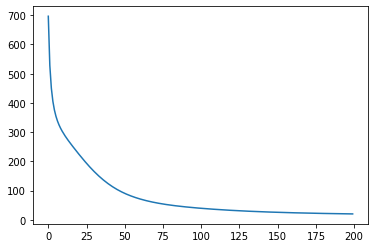

In [8]:
# 손실이 줄어드는 걸 시각화(디버깅에 도움이 됨)
plt.plot(costs)